In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
toyota=pd.read_csv('toyota.csv')

In [3]:
toyota.shape

(6738, 9)

In [4]:
toyota.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [5]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [6]:
toyota['model'].value_counts()

 Yaris            2122
 Aygo             1961
 Auris             712
 C-HR              479
 RAV4              473
 Corolla           267
 Prius             232
 Avensis           115
 Verso             114
 Hilux              86
 GT86               73
 Land Cruiser       51
 PROACE VERSO       15
 Supra              12
 Camry              11
 IQ                  8
 Urban Cruiser       4
 Verso-S             3
Name: model, dtype: int64

In [7]:
toyota.transmission.unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

In [8]:
toyota.model.unique()

array([' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
       ' Prius', ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO',
       ' Land Cruiser', ' Supra', ' Camry', ' Verso-S', ' IQ',
       ' Urban Cruiser'], dtype=object)

In [9]:
toyota.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_10164\4003401215.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(toyota.corr(),annot=True,fmt='.2f')


<Axes: >

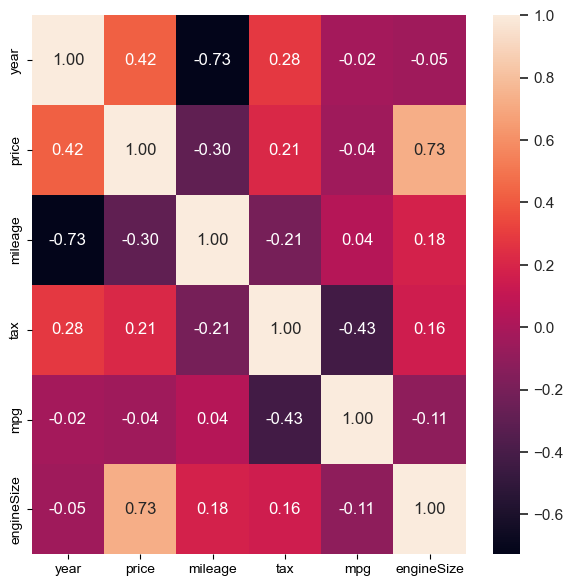

In [10]:
fig, ax=plt.subplots(figsize=(7,7))
sns.set(font_scale=1.0)
sns.heatmap(toyota.corr(),annot=True,fmt='.2f')

Text(0, 0.5, 'Price')

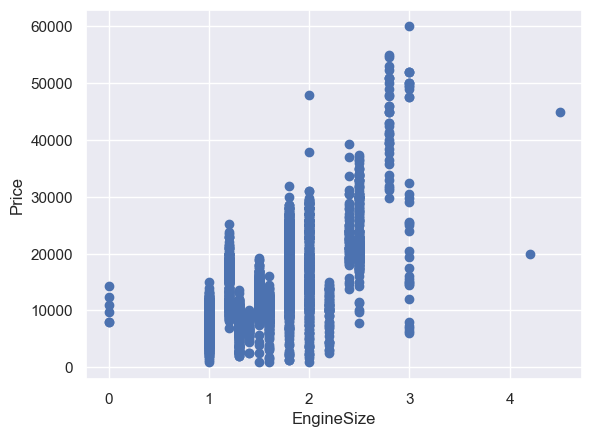

In [11]:
plt.scatter(toyota.engineSize,toyota.price)
plt.xlabel("EngineSize")
plt.ylabel('Price')

Text(0, 0.5, 'Price')

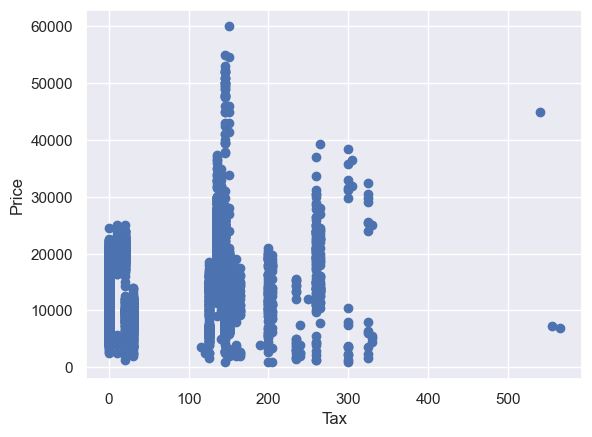

In [12]:
plt.scatter(toyota.tax,toyota.price)
plt.xlabel("Tax")
plt.ylabel('Price')

Text(0, 0.5, 'Price')

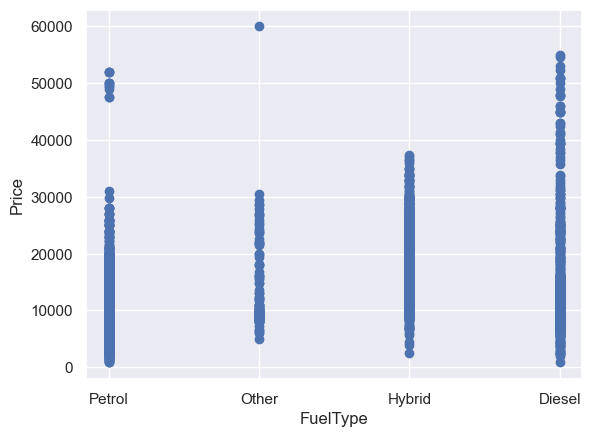

In [13]:
plt.scatter(toyota.fuelType,toyota.price)
plt.xlabel("FuelType")
plt.ylabel('Price')

In [14]:
from sklearn.preprocessing import LabelEncoder
toyota['model']=LabelEncoder().fit_transform(toyota['model'])
toyota['transmission']=LabelEncoder().fit_transform(toyota['transmission'])
toyota['fuelType']=LabelEncoder().fit_transform(toyota['fuelType'])

In [15]:
toyota.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,6,2016,16000,1,24089,3,265,36.2,2.0
1,6,2017,15995,1,18615,3,145,36.2,2.0
2,6,2015,13998,1,27469,3,265,36.2,2.0
3,6,2017,18998,1,14736,3,150,36.2,2.0
4,6,2017,17498,1,36284,3,145,36.2,2.0


In [16]:
x=toyota.drop(columns='price')
y=toyota['price']
x.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,6,2016,1,24089,3,265,36.2,2.0
1,6,2017,1,18615,3,145,36.2,2.0
2,6,2015,1,27469,3,265,36.2,2.0
3,6,2017,1,14736,3,150,36.2,2.0
4,6,2017,1,36284,3,145,36.2,2.0


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape)
print(x_test.shape)

(5053, 8)
(1685, 8)


In [18]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
lr=LinearRegression()
lr.fit(x_train,y_train)
rdg=Ridge(alpha=1)
rdg.fit(x_train,y_train)
ls=Lasso(alpha=1)
ls.fit(x_train,y_train)

Lasso(alpha=1)

In [19]:
print("lr.train: ",lr.score(x_train,y_train))
print("rdg.train: ",rdg.score(x_train,y_train))
print("ls.train: ",ls.score(x_train,y_train))

lr.train:  0.7861636717715417
rdg.train:  0.7861614806784715
ls.train:  0.7861634367834869


In [20]:
lr_pred=lr.predict(x_test)
rdg_pred=rdg.predict(x_test)
ls_pred=ls.predict(x_test)

In [21]:
print("lr-r2 score: ",r2_score(y_test,lr_pred))
print("rdg-r2 score: ",r2_score(y_test,rdg_pred))
print("ls-r2 score: ",r2_score(y_test,ls_pred))

lr-r2 score:  0.7650715952180835
rdg-r2 score:  0.7651725766700218
ls-r2 score:  0.7651089713764077


In [22]:
print("lr-RMSE: ",np.sqrt(mean_squared_error(y_test,lr_pred)))
print("rdg-RMSE: ",np.sqrt(mean_squared_error(y_test,rdg_pred)))
print("ls-RMSE: ",np.sqrt(mean_squared_error(y_test,ls_pred)))

lr-RMSE:  3080.8107911404572
rdg-RMSE:  3080.1485932560186
ls-RMSE:  3080.565709128562


In [23]:
poly=PolynomialFeatures(degree=2)
x_train_tf=poly.fit_transform(x_train)
x_test_tf=poly.fit_transform(x_test)
pol=LinearRegression().fit(x_train_tf,y_train)

In [24]:
print("pol-train: ",pol.score(x_train_tf,y_train))

pol-train:  0.9147748241350535


In [30]:
pol_pred=pol.predict(x_test_tf)
print("pol-RMSE：" ,np.sqrt(mean_squared_error(y_test,pol_pred)))
print("pol-r2 score：",r2_score(y_test,pol_pred))

pol-RMSE： 1963.970532152127
pol-r2 score： 0.9045281340758293


In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(x_train,y_train)
rf = RandomForestRegressor(n_estimators = 100,random_state=0)
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [33]:
print("dt.train:",dt.score(x_train,y_train))
print("rf.train:",rf.score(x_train,y_train))

dt.train: 0.9998873430372752
rf.train: 0.9938652804140827


In [35]:
dt_pred=dt.predict(x_test)
rf_pred=rf.predict(x_test)
print("dt-r2 score:",r2_score(y_test,dt_pred))
print("rf-r2 score:",r2_score(y_test,rf_pred))

dt-r2 score: 0.944326575598385
rf-r2 score: 0.9644114757059148


In [36]:
print("dt-RMSE：" ,np.sqrt(mean_squared_error(y_test,dt_pred)))
print("rf-RMSE：" ,np.sqrt(mean_squared_error(y_test,rf_pred)))

dt-RMSE： 1499.7581458623965
rf-RMSE： 1199.0912999684008


In [37]:
toyota.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,6,2016,16000,1,24089,3,265,36.2,2.0
1,6,2017,15995,1,18615,3,145,36.2,2.0
2,6,2015,13998,1,27469,3,265,36.2,2.0
3,6,2017,18998,1,14736,3,150,36.2,2.0
4,6,2017,17498,1,36284,3,145,36.2,2.0


In [41]:
lr.predict([[3,2019,1,30000,1,250,35,1.3]])

C:\Users\User\anaconda\envs\mbdiploma\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11697.42656604])

In [42]:
pol.predict(poly.fit_transform([[3,2019,1,30000,1,250,35,1.3]]))

array([13323.20286176])

In [43]:
rf.predict([[3,2019,1,30000,1,250,35,1.3]])

C:\Users\User\anaconda\envs\mbdiploma\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([16400.79])